In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import asyncio
import random
import time

In [2]:
from Router import Router, OSPFRouter, GOSPFRouter, EcoRouter
from Link import Link, EcoRPLink
from Packet import Packet, T1LSA, LSA
from Network import Network, GOSPFNetwork, EcoRPNetwork

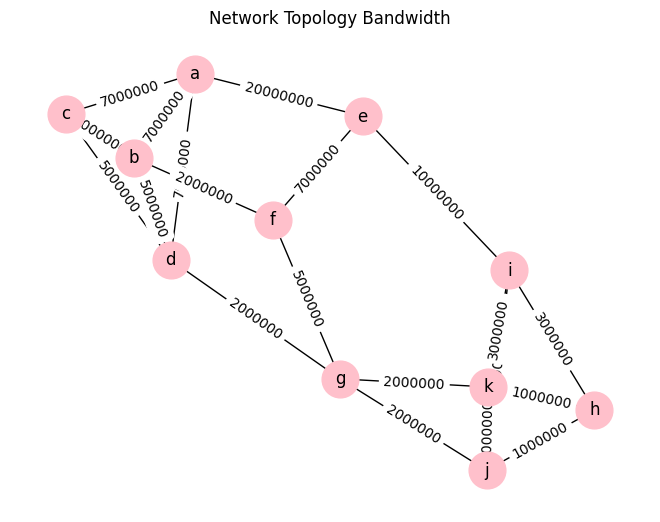

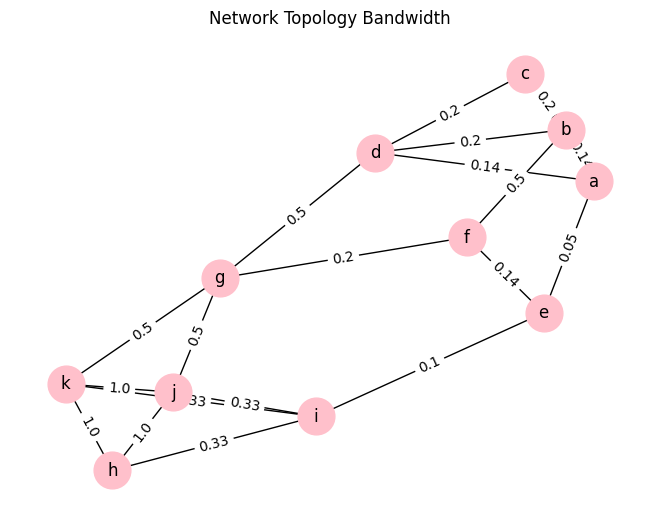

In [4]:
a = GOSPFRouter("a", n_interfaces=4)
b = GOSPFRouter("b", n_interfaces=4)
c = GOSPFRouter("c", n_interfaces=4)
d = GOSPFRouter("d", n_interfaces=4)
e = GOSPFRouter("e", n_interfaces=4)
f = GOSPFRouter("f", n_interfaces=4)
g = GOSPFRouter("g", n_interfaces=8)
h = GOSPFRouter("h", n_interfaces=4)
i = GOSPFRouter("i", n_interfaces=4)
j = GOSPFRouter("j", n_interfaces=4)
k = GOSPFRouter("k", n_interfaces=4)

nodes = [a, b, c, d, e, f, g, h, i, j, k]
ab = Link(7_000_000)
ac = Link(7_000_000)
ad = Link(7_000_000)

ae = Link(20_000_000)

bc = Link(5_000_000)
bd = Link(5_000_000)
cd = Link(5_000_000)

ef = Link(7_000_000)

ei = Link(10_000_000)

fg = Link(5_000_000)

bf = Link(2_000_000)
dg = Link(2_000_000)

ih = Link(3_000_000)
ij = Link(3_000_000)
ik = Link(3_000_000)

hk = Link(1_000_000)
hj = Link(1_000_000)
jk = Link(1_000_000)

jg = Link(2_000_000)
kg = Link(2_000_000)


ab.create_link(a, 0, b, 0)
ac.create_link(a, 1, c, 0)
ad.create_link(a, 2, d, 0)
ae.create_link(a, 3, e, 0)

bc.create_link(b, 1, c, 1)
bd.create_link(b, 2, d, 1)
cd.create_link(c, 2, d, 2)

ef.create_link(e, 1, f, 0)
ei.create_link(e, 2, i, 0)

fg.create_link(f, 1, g, 1)

bf.create_link(b, 3, f, 2)
dg.create_link(d, 3, g, 2)

ih.create_link(i, 1, h, 0)
ij.create_link(i, 2, j, 0)
ik.create_link(i, 3, k, 0)
hk.create_link(h, 1, k, 1)
hj.create_link(h, 2, j, 1)
jk.create_link(j, 2, k, 2)
jg.create_link(j, 3, g, 3)
kg.create_link(k, 3, g, 4)


links = [ab, ac, ad, ae, bc, bd, cd, ef, ei, fg, bf, dg, ih, ij, ik, hk, hj, jk, jg, kg]

net = GOSPFNetwork()
for node in nodes:
    net.add_node(node)

for link in links:
    net.add_link(link)

G = net.get_network_state()
pos = nx.spring_layout(G)  # Define node positions using a spring layout
for edge in G.edges(data=True):
    G.edges[edge[0], edge[1]]['cost'] = round(G.edges[edge[0], edge[1]]['cost'], 2)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="pink")  # Draw nodes
labels = nx.get_edge_attributes(G, 'capacity')  # Get edge weights as labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)  # Draw edge labels
plt.title("Network Topology Bandwidth")
plt.show()

a = OSPFRouter("a", n_interfaces=4)
b = OSPFRouter("b", n_interfaces=4)
c = OSPFRouter("c", n_interfaces=4)
d = OSPFRouter("d", n_interfaces=4)
e = OSPFRouter("e", n_interfaces=4)
f = OSPFRouter("f", n_interfaces=4)
g = OSPFRouter("g", n_interfaces=8)
h = OSPFRouter("h", n_interfaces=4)
i = OSPFRouter("i", n_interfaces=4)
j = OSPFRouter("j", n_interfaces=4)
k = OSPFRouter("k", n_interfaces=4)

ospf_nodes = [a, b, c, d, e, f, g, h, i, j, k]
ab = Link(7_000_000)
ac = Link(7_000_000)
ad = Link(7_000_000)

ae = Link(20_000_000)

bc = Link(5_000_000)
bd = Link(5_000_000)
cd = Link(5_000_000)

ef = Link(7_000_000)

ei = Link(10_000_000)

fg = Link(5_000_000)

bf = Link(2_000_000)
dg = Link(2_000_000)

ih = Link(3_000_000)
ij = Link(3_000_000)
ik = Link(3_000_000)

hk = Link(1_000_000)
hj = Link(1_000_000)
jk = Link(1_000_000)

jg = Link(2_000_000)
kg = Link(2_000_000)


ab.create_link(a, 0, b, 0)
ac.create_link(a, 1, c, 0)
ad.create_link(a, 2, d, 0)
ae.create_link(a, 3, e, 0)

bc.create_link(b, 1, c, 1)
bd.create_link(b, 2, d, 1)
cd.create_link(c, 2, d, 2)

ef.create_link(e, 1, f, 0)
ei.create_link(e, 2, i, 0)

fg.create_link(f, 1, g, 1)

bf.create_link(b, 3, f, 2)
dg.create_link(d, 3, g, 2)

ih.create_link(i, 1, h, 0)
ij.create_link(i, 2, j, 0)
ik.create_link(i, 3, k, 0)
hk.create_link(h, 1, k, 1)
hj.create_link(h, 2, j, 1)
jk.create_link(j, 2, k, 2)
jg.create_link(j, 3, g, 3)
kg.create_link(k, 3, g, 4)


ospf_links = [ab, ac, ad, ae, bc, bd, cd, ef, ei, fg, bf, dg, ih, ij, ik, hk, hj, jk, jg, kg]


ospf_net = Network()
for node in ospf_nodes:
    ospf_net.add_node(node)

for link in ospf_links:
    ospf_net.add_link(link)

G = ospf_net.get_network_state()
for edge in G.edges(data=True):
    G.edges[edge[0], edge[1]]['cost'] = round(G.edges[edge[0], edge[1]]['cost'], 2)
pos = nx.spring_layout(G)  # Define node positions using a spring layout
nx.draw(G, pos, with_labels=True, node_size=700, node_color="pink")  # Draw nodes
labels = nx.get_edge_attributes(G, 'cost')  # Get edge weights as labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, )  # Draw edge labels
plt.title("Network Topology Bandwidth")
plt.show()

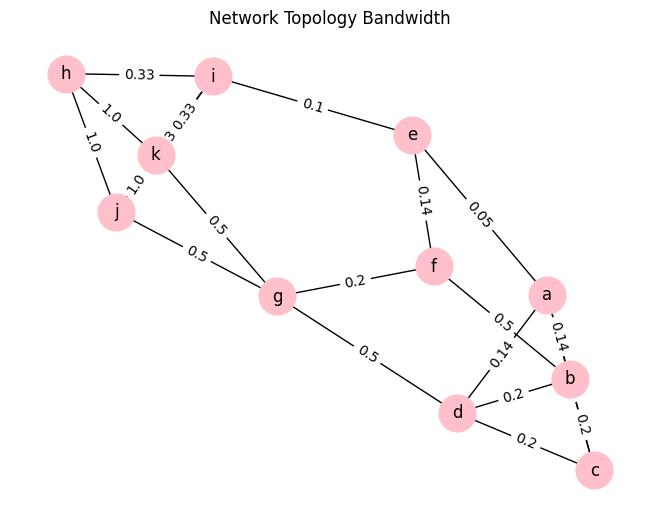

In [8]:
a = EcoRouter("a", n_interfaces=4)
b = EcoRouter("b", n_interfaces=4)
c = EcoRouter("c", n_interfaces=4)
d = EcoRouter("d", n_interfaces=4)
e = EcoRouter("e", n_interfaces=4)
f = EcoRouter("f", n_interfaces=4)
g = EcoRouter("g", n_interfaces=8)
h = EcoRouter("h", n_interfaces=4)
i = EcoRouter("i", n_interfaces=4)
j = EcoRouter("j", n_interfaces=4)
k = EcoRouter("k", n_interfaces=4)

eco_nodes = [a, c, d, f, i, j, k]
eco_access = [b, e, g, h]
ab = EcoRPLink(7_000_000)
ac = EcoRPLink(7_000_000)
ad = EcoRPLink(7_000_000)

ae = EcoRPLink(20_000_000)

bc = EcoRPLink(5_000_000)
bd = EcoRPLink(5_000_000)
cd = EcoRPLink(5_000_000)

ef = EcoRPLink(7_000_000)

ei = EcoRPLink(10_000_000)

fg = EcoRPLink(5_000_000)

bf = EcoRPLink(2_000_000)
dg = EcoRPLink(2_000_000)

ih = EcoRPLink(3_000_000)
ij = EcoRPLink(3_000_000)
ik = EcoRPLink(3_000_000)

hk = EcoRPLink(1_000_000)
hj = EcoRPLink(1_000_000)
jk = EcoRPLink(1_000_000)

jg = EcoRPLink(2_000_000)
kg = EcoRPLink(2_000_000)


ab.create_link(a, 0, b, 0)
ac.create_link(a, 1, c, 0)
ad.create_link(a, 2, d, 0)
ae.create_link(a, 3, e, 0)

bc.create_link(b, 1, c, 1)
bd.create_link(b, 2, d, 1)
cd.create_link(c, 2, d, 2)

ef.create_link(e, 1, f, 0)
ei.create_link(e, 2, i, 0)

fg.create_link(f, 1, g, 1)

bf.create_link(b, 3, f, 2)
dg.create_link(d, 3, g, 2)

ih.create_link(i, 1, h, 0)
ij.create_link(i, 2, j, 0)
ik.create_link(i, 3, k, 0)
hk.create_link(h, 1, k, 1)
hj.create_link(h, 2, j, 1)
jk.create_link(j, 2, k, 2)
jg.create_link(j, 3, g, 3)
kg.create_link(k, 3, g, 4)


eco_links = [ab, ac, ad, ae, bc, bd, cd, ef, ei, fg, bf, dg, ih, ij, ik, hk, hj, jk, jg, kg]


eco_net = EcoRPNetwork(alpha = 30)
for node in eco_nodes:
    eco_net.add_node(node)

for node in eco_access:
    eco_net.add_access_node(node)

for link in eco_links:
    eco_net.add_link(link)

G = eco_net.get_network_state()
for edge in G.edges(data=True):
    G.edges[edge[0], edge[1]]['cost'] = round(G.edges[edge[0], edge[1]]['cost'], 2)
pos = nx.spring_layout(G)  # Define node positions using a spring layout
nx.draw(G, pos, with_labels=True, node_size=700, node_color="pink")  # Draw nodes
labels = nx.get_edge_attributes(G, 'cost')  # Get edge weights as labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, )  # Draw edge labels
plt.title("Network Topology Bandwidth")
plt.show()

In [25]:
random.seed(2024)
for node in nodes:
    node.sync_lsdb(net.get_network_state())
    node.check_link_status()
await asyncio.sleep(2)

for node in nodes:
    node.update_current_topo(net.get_active_network_state())
    node.sync_lsdb(net.get_network_state())

print(net.get_active_network_state())
print(net.get_network_state())

sending_nodes = random.sample(nodes, 4)   # 4 random sender nodes
# energy_data = []
# gospf_dropped = []

net.start_monitoring()
for i in range(50):
    for _ in range(min(i, 100-i)):
        # pkt_size = 2 * (i - 50) ** 2
        # pkt_size = random.randint(1, )
        pkt_size = 200_000
        test_pkt = Packet(pkt_size, "test packet")
        target_router = random.choice(net.nodes)
        source_router = random.choice(sending_nodes)
        source_router.send_message(target_router, test_pkt)
    await asyncio.sleep(0.2)
    # print([link.get_activity_rate(reset_activity=False) for link in net.links])
    # energy_data.append(net.get_total_energy(reset_activity=False))
    # gospf_dropped.append(net.get_dropped_packets())

energy_data, gospf_dropped = net.stop_monitoring()


for node in ospf_nodes:
    node.sync_lsdb(ospf_net.get_network_state())

# ospf_energy_data = []
sending_nodes = random.sample(ospf_nodes, 4)   # 4 random sender nodes
# ospf_dropped = []

ospf_net.start_monitoring()

for i in range(50):
    for _ in range(min(i, 100-i)):
        # pkt_size = 2 * (i - 50) ** 2
        # pkt_size = random.randint(1, 2* (i-50) ** 1)
        pkt_size = 200_000
        test_pkt = Packet(pkt_size, "test packet")
        target_router = random.choice(ospf_nodes)
        source_router = random.choice(sending_nodes)
        source_router.send_message(target_router, test_pkt)
    await asyncio.sleep(0.2)
    # print([link.get_activity_rate(reset_activity=False) for link in ospf_net.links])
    # ospf_energy_data.append(ospf_net.get_total_energy(reset_activity=True))
    # ospf_dropped.append(ospf_net.get_dropped_packets())

ospf_energy_data, ospf_dropped = ospf_net.stop_monitoring()
# 

Graph with 11 nodes and 10 edges
Graph with 11 nodes and 20 edges


In [26]:
for node in eco_net.nodes:
    node.sync_lsdb(net.get_network_state())

print(eco_net.get_active_network_state())
print(eco_net.get_network_state())

sending_nodes = random.sample(eco_net.access_nodes, 4)   # 4 random sender nodes
# energy_data = []
# gospf_dropped = []

eco_net.start_monitoring()
for i in range(100):
    for _ in range(min(i, 100-i)):
        # pkt_size = 2 * (i - 50) ** 2
        # pkt_size = random.randint(1, )
        pkt_size = 400_000
        test_pkt = Packet(pkt_size, "test packet")
        target_router = random.choice(eco_net.access_nodes)
        source_router = random.choice(sending_nodes)
        source_router.send_message(target_router, test_pkt)
    await asyncio.sleep(0.1)
    # print([link.get_activity_rate(reset_activity=False) for link in net.links])
    # energy_data.append(net.get_total_energy(reset_activity=False))
    # gospf_dropped.append(net.get_dropped_packets())

eco_energy, eco_dropped = eco_net.stop_monitoring()

Graph with 11 nodes and 20 edges
Graph with 11 nodes and 20 edges


In [27]:
print(eco_energy)

[531.2800000000002, 591.2800000000002, 561.2800000000002, 501.28000000000014, 501.28000000000014, 501.28000000000014, 501.28000000000014, 501.28000000000014, 501.28000000000014, 501.28000000000014, 501.28000000000014]


Text(0.5, 1.0, 'Random packet transmission - 200Kb')

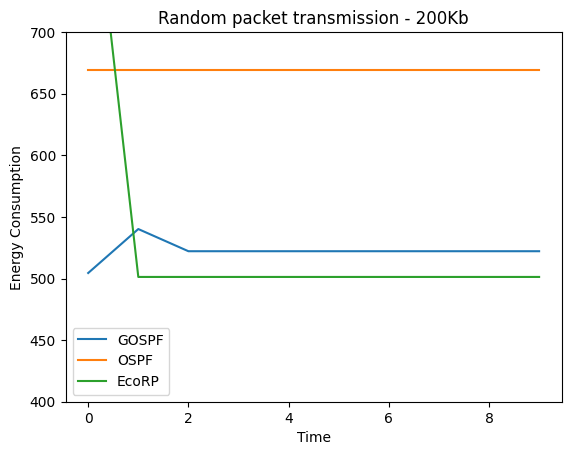

In [22]:
plt.ylim(400, 700)
plt.plot(energy_data[1:], label="GOSPF")
plt.plot(ospf_energy_data[1:], label="OSPF")
plt.plot(eco_energy[1:], label="EcoRP")
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.legend()
plt.title("Random packet transmission - 200Kb")

Text(0.5, 1.0, 'Random packet transmission - 200Kb')

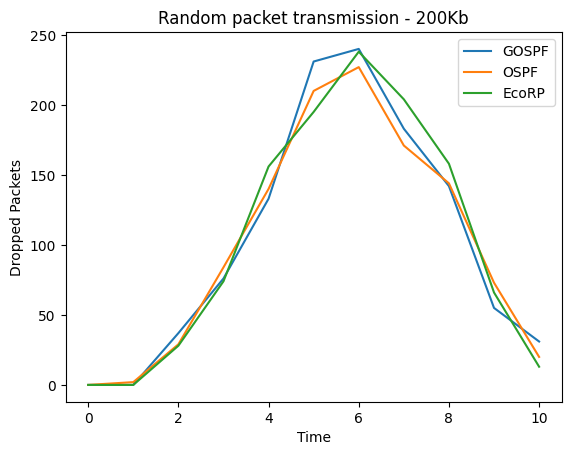

In [23]:
plt.plot(gospf_dropped, label="GOSPF")
plt.plot(ospf_dropped, label="OSPF")
plt.plot(eco_dropped, label="EcoRP")
plt.xlabel("Time")
plt.ylabel("Dropped Packets")
plt.legend()
plt.title("Random packet transmission - 200Kb")

Text(0.5, 1.0, 'Random packet transmission - 200Kb')

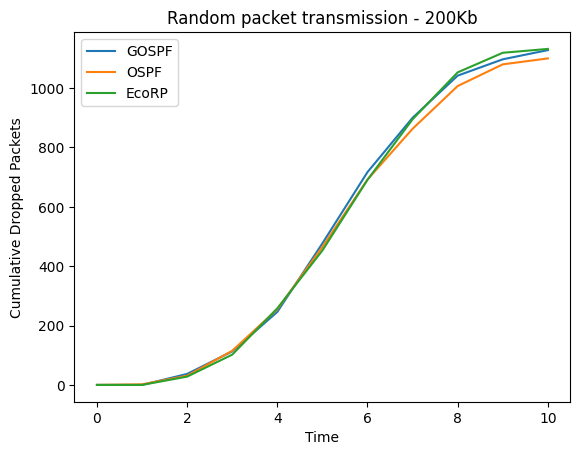

In [24]:
cum_gospf_dropped = np.cumsum(gospf_dropped)
cum_ospf_dropped = np.cumsum(ospf_dropped)
cum_eco_dropped = np.cumsum(eco_dropped)
plt.plot(cum_gospf_dropped, label="GOSPF")
plt.plot(cum_ospf_dropped, label="OSPF")
plt.plot(cum_eco_dropped, label="EcoRP")
plt.xlabel("Time")
plt.ylabel("Cumulative Dropped Packets")
plt.legend()
plt.title("Random packet transmission - 200Kb")

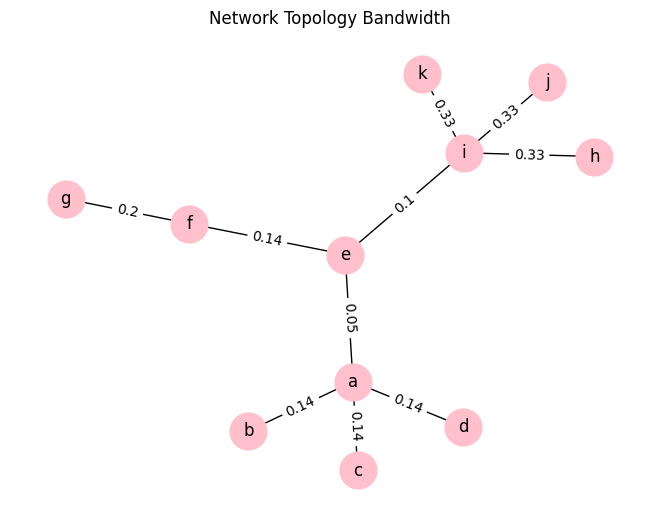

In [ ]:
G = net.get_active_network_state()
for edge in G.edges(data=True):
    G.edges[edge[0], edge[1]]['cost'] = round(G.edges[edge[0], edge[1]]['cost'], 2)
pos = nx.spring_layout(G)  # Define node positions using a spring layout
nx.draw(G, pos, with_labels=True, node_size=700, node_color="pink")  # Draw nodes
labels = nx.get_edge_attributes(G, 'cost')  # Get edge weights as labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, )  # Draw edge labels
plt.title("Network Topology Bandwidth")
plt.show()